In [ ]:
!rm -rf data && mkdir data
!gdown 1EehgobYr1PaaDDAnFG03ZS6OLcHmqk1f -O data.zip
!unzip -q data.zip -d data

In [7]:
import glob as gl
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import PIL

In [ ]:
image_count = len(list(gl.glob('/content/data/processed_dataset/*/*.jpg')))
print(f'{image_count} examples of weather')

categories = ['cloudy','foggy', 'lightning', 'rainbow', 'rainy', 'snow', 'sunny', 'sunrise']

for category in categories:
    count = len(list(gl.glob(f'/content/data/processed_dataset/{category}/*.jpg')))
    print(f"{category} count = {count}")


In [9]:
batch_size = 32
class_count = 8

img_height = 100
img_width = 100

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/data/processed_dataset/',
  subset = 'training',
  validation_split = 0.1,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/data/processed_dataset/',
  subset = 'validation',
  validation_split = 0.1,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2469 files belonging to 8 classes.
Using 2223 files for training.
Found 2469 files belonging to 8 classes.
Using 246 files for validation.


In [12]:
class_names = train_ds.class_names
print(f'class names: {class_names}')

class names: ['cloudy', 'foggy', 'lightning', 'rainbow', 'rainy', 'snow', 'sunny', 'sunrise']


In [13]:
train_ds = train_ds.cache().shuffle(2500).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(class_count)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        1

In [19]:
epochs=40
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/40
70/70 [==============================] - 23s 327ms/step - loss: 0.1003 - accuracy: 0.9672 - val_loss: 1.2718 - val_accuracy: 0.7317
Epoch 2/40
70/70 [==============================] - 22s 308ms/step - loss: 0.0381 - accuracy: 0.9897 - val_loss: 1.2989 - val_accuracy: 0.7398
Epoch 3/40
70/70 [==============================] - 21s 306ms/step - loss: 0.0158 - accuracy: 0.9964 - val_loss: 1.3225 - val_accuracy: 0.7602
Epoch 4/40
70/70 [==============================] - 26s 376ms/step - loss: 0.0127 - accuracy: 0.9964 - val_loss: 1.3345 - val_accuracy: 0.7764
Epoch 5/40
70/70 [==============================] - 20s 283ms/step - loss: 0.0066 - accuracy: 0.9991 - val_loss: 1.4878 - val_accuracy: 0.7724
Epoch 6/40
70/70 [==============================] - 21s 304ms/step - loss: 0.0101 - accuracy: 0.9960 - val_loss: 1.6186 - val_accuracy: 0.7683
Epoch 7/40
70/70 [==============================] - 22s 316ms/step - loss: 0.0329 - accuracy: 0.9906 - val_loss: 1.6544 - val_accuracy: 0.7317

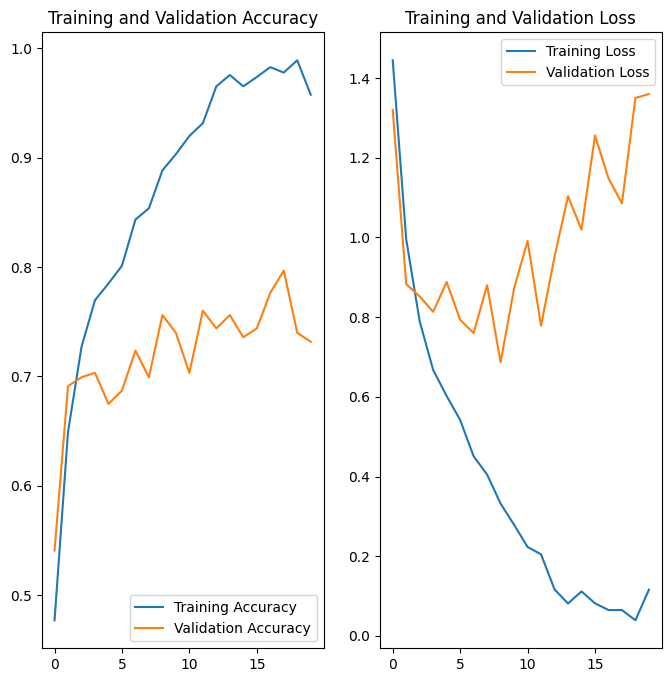

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
from sklearn.metrics import classification_report

def evaluate_model(val_ds,model):
  y_pred=[]
  y_true=[]

  for batch_images,batch_labels in val_ds:
    predictions=model.predict(batch_images,verbose=0)
    y_pred=y_pred+np.argmax(tf.nn.softmax(predictions),axis=1).tolist()
    y_true=y_true+batch_labels.numpy().tolist()
  print(classification_report(y_true,y_pred))



evaluate_model(val_ds,model)

              precision    recall  f1-score   support

           0       0.65      0.62      0.63        32
           1       0.80      0.47      0.59        34
           2       0.77      0.97      0.86        34
           3       0.75      0.71      0.73        21
           4       0.75      0.56      0.64        32
           5       0.71      0.75      0.73        32
           6       0.69      0.81      0.75        31
           7       0.76      0.97      0.85        30

    accuracy                           0.73       246
   macro avg       0.73      0.73      0.72       246
weighted avg       0.73      0.73      0.72       246

